<a href="https://colab.research.google.com/github/Vineeth37/ML/blob/main/Handling_Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- `Using Mean Median Mode `
- `End_of_Distribution`
- `Arbitary_value `
- `Constant_value_concept`
- `Random_sample_imputation **`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_c = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data_c.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data_c.shape

(891, 12)

In [ ]:
data_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Mean_Median_Mode**

In [ ]:
def missing_data(data_c,var,mean,median,mode):
  data_c[var+'_mean'] = data_c[var].fillna(mean)
  data_c[var+'_median'] = data_c[var].fillna(median)
  data_c[var+'_mode'] = data_c[var].fillna(mode[0])

In [ ]:
age_mean = data_c['Age'].mean()
age_median = data_c['Age'].median()
age_mode = data_c['Age'].mode()


In [ ]:
missing_data(data_c,'Age',age_mean,age_median,age_mode)

In [ ]:
data_c.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,28.0,24.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000,54.0,54.0


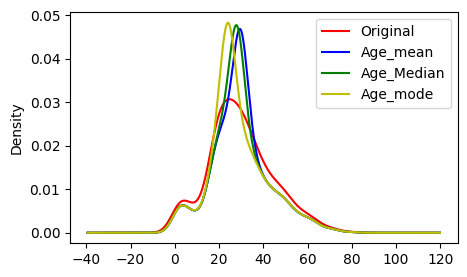

In [ ]:
plt.figure(figsize=(5,3))


data_c['Age'].plot(kind='kde',color='r',label='Original')
data_c['Age_mean'].plot(kind='kde',color='b',label='Age_mean')
data_c['Age_median'].plot(kind='kde',color='g',label='Age_Median')
data_c['Age_mode'].plot(kind='kde',color='y',label='Age_mode')

plt.legend(loc = 0)
plt.show()

In [ ]:
print(f'Original Age COlumn with NUll values : {data_c["Age"].std()}')
print(f'Age_mean : {data_c["Age_mean"].std()}')
print(f'Age_medina : {data_c["Age_median"].std()}')
print(f'Age_mode : {data_c["Age_mode"].std()}')

Original Age COlumn with NUll values : 14.526497332334042
Age_mean : 13.002015226002882
Age_medina : 13.019696550973201
Age_mode : 13.19957176774647


In [ ]:
# since mode std if close to original age so I can finalize Mode:

data_c = data_c.drop(['Age','Age_mean','Age_median'],axis=1)
data_c.head(7)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,24.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,54.0


**End_of_Distribution**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_c = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data_c.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
value = data_c['Age'].mean() + 3 * data_c['Age'].std()
value

73.27860964406094

In [ ]:
data_c['Age_end'] = data_c['Age'].fillna(value)

In [ ]:
data_c.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_end
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,73.27861
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.00000


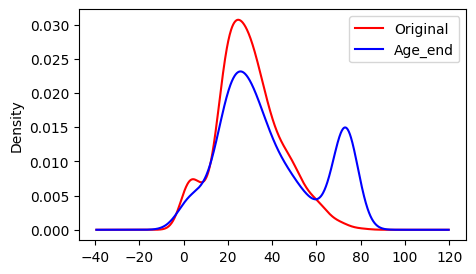

In [ ]:
plt.figure(figsize=(5,3))


data_c['Age'].plot(kind='kde',color='r',label='Original')
data_c['Age_end'].plot(kind='kde',color='b',label='Age_end')

plt.legend(loc = 0)
plt.show()

In [ ]:
print(f'Original Age COlumn with NUll values : {data_c["Age"].std()}')
print(f'Age_end : {data_c["Age_end"].std()}')


Original Age COlumn with NUll values : 14.526497332334042
Age_end : 21.719150677136394


**Arbitary_value**
**Constant_value**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_c = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data_c.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data_c['Age_arbi'] = data_c['Age'].fillna(999)

In [ ]:
data_c['Age_const'] = np.where(data_c['Age'].isnull(),0,1)

In [ ]:
data_c.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_arbi,Age_const
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,999.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,1


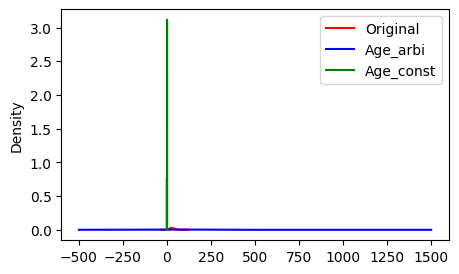

In [ ]:
plt.figure(figsize=(5,3))


data_c['Age'].plot(kind='kde',color='r',label='Original')
data_c['Age_arbi'].plot(kind='kde',color='b',label='Age_arbi')
data_c['Age_const'].plot(kind='kde',color='g',label='Age_const')

plt.legend(loc = 0)
plt.show()

In [ ]:
print(f'Original Age COlumn with NUll values : {data_c["Age"].std()}')
print(f'Age_arbi : {data_c["Age_arbi"].std()}')
print(f'Age_const : {data_c["Age_const"].std()}')

Original Age COlumn with NUll values : 14.526497332334042
Age_arbi : 387.1734036271881
Age_const : 0.39921043398804806


**Random_sample_imputation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_c = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data_c.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
s = data_c['Age'].dropna().sample(data_c['Age'].isnull().sum(),random_state=42)
s

,Age
149,42.0
407,3.0
53,29.0
369,24.0
818,43.0
...,...
38,18.0
247,24.0
445,4.0
323,22.0


In [ ]:
data_c[data_c['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [ ]:
x = data_c[data_c['Age'].isnull()].head(1)
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
s = data_c['Age'].dropna().sample(1 , random_state = 42)
print(s)
print(s.index)
s.index = [10]
data_c['Age_c'] = s

149    42.0
Name: Age, dtype: float64
Index([149], dtype='int64')


In [ ]:
data_c.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_c
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


In [ ]:
def random(df , variable):
    df[variable+"_replaced"] = df[variable].copy()
    s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)
    s.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull() , 'Age_replaced'] = s



In [ ]:
random(data_c,'Age')

In [ ]:
data_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_c,Age_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,35.0


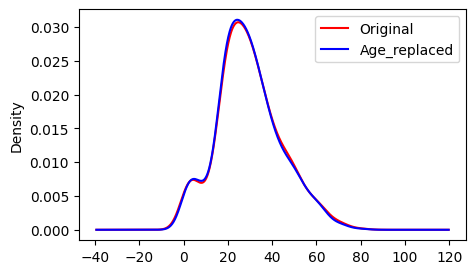

In [ ]:
plt.figure(figsize=(5,3))


data_c['Age'].plot(kind='kde',color='r',label='Original')
data_c['Age_replaced'].plot(kind='kde',color='b',label='Age_replaced')


plt.legend(loc = 0)
plt.show()

In [ ]:
print(f'Original Age COlumn with NUll values : {data_c["Age"].std()}')
print(f'Age_replaced : {data_c["Age_replaced"].std()}')


Original Age COlumn with NUll values : 14.526497332334042
Age_replaced : 14.295286948654619


In [ ]:
# cat_to_num using one_hot_encoding -> get_dummies

In [ ]:
data = pd.DataFrame({'Name' : ['John','Peter','Priya','Hassin'],
                     'Gender':['Male','Male','Female','Female'],
                     'Region':['East','West','North','South']})
data

,Name,Gender,Region
0,John,Male,East
1,Peter,Male,West
2,Priya,Female,North
3,Hassin,Female,South


In [ ]:
f = pd.get_dummies(data[['Gender','Region']],dtype=float)
f

,Gender_Female,Gender_Male,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
final = pd.concat([data,f],axis=1)
final

,Name,Gender,Region,Gender_Female,Gender_Male,Region_East,Region_North,Region_South,Region_West
0,John,Male,East,0.0,1.0,1.0,0.0,0.0,0.0
1,Peter,Male,West,0.0,1.0,0.0,0.0,0.0,1.0
2,Priya,Female,North,1.0,0.0,0.0,1.0,0.0,0.0
3,Hassin,Female,South,1.0,0.0,0.0,0.0,1.0,0.0


**Variable Transformation**

- `Log Technique `
- `reciprocal `
- `square root `
- `exponential `
- `box cox `
- `yeoJohnson Technique `

In [ ]:
data_c = pd.read_csv('Titanic-Dataset.csv')
data_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from scipy import stats
import pylab
import scipy

In [ ]:
def fun(data_c,var):
  plt.figure(figsize = (12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind='kde')

  plt.subplot(1,3,2)
  sns.boxplot(x = data_c[var])

  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist='norm',plot = plt)
  plt.show()

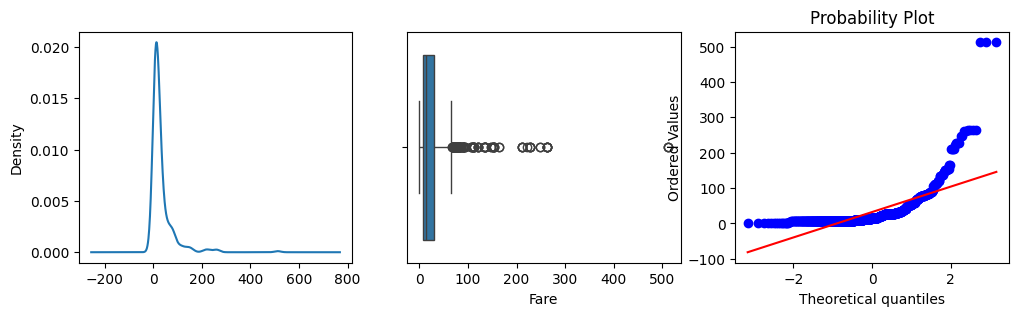

In [ ]:
fun(data_c,'Fare')

In [ ]:
# log

data_c['Fare_log'] = np.log(data_c['Fare']+1)

In [ ]:
data_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


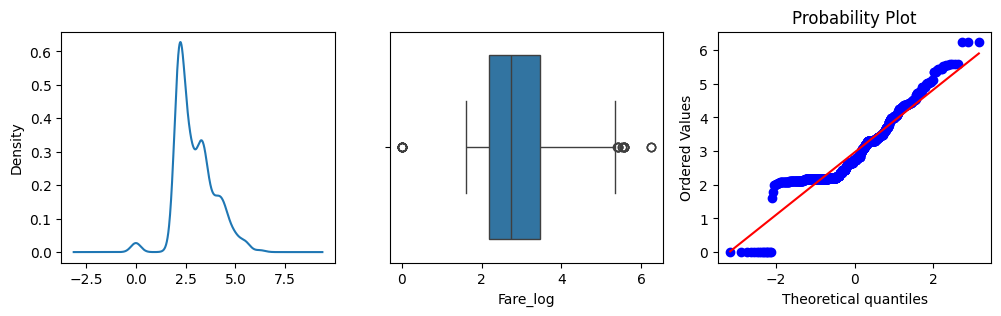

In [ ]:
fun(data_c,'Fare_log')

In [ ]:
data_c['Fare_re'] = 1 / data_c['Fare']

In [ ]:
data_c.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Fare_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,0.137931
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,0.014029
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,0.126183
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,0.018832
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,0.124224


/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

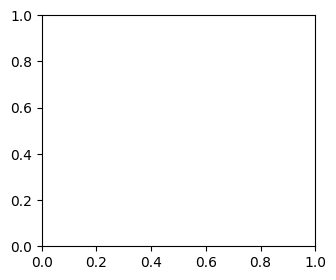

In [ ]:
fun(data_c,'Fare_re')

In [ ]:
# square root
data_c['Fare_sqrt'] = np.sqrt(data_c['Fare'])

In [ ]:
data_c.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Fare_re,Fare_sqrt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,0.137931,2.692582
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,0.014029,8.442944
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,0.126183,2.815138
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,0.018832,7.286975
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,0.124224,2.837252


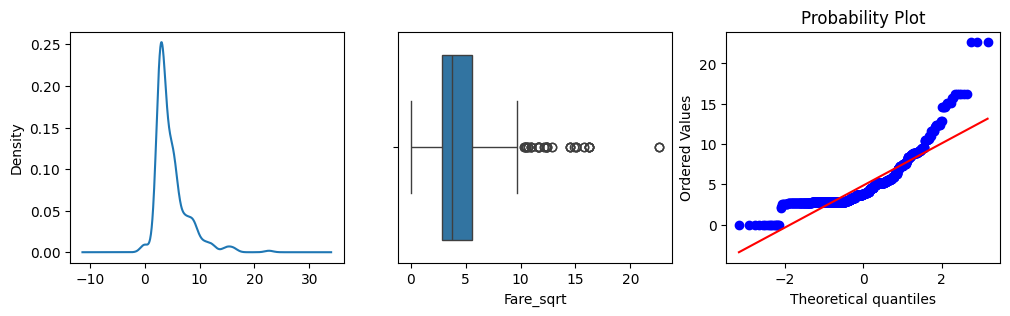

In [ ]:
fun(data_c,'Fare_sqrt')

In [ ]:
# exponential

data_c['Fare_e'] = np.exp(data_c['Fare'])

ValueError: array must not contain infs or NaNs

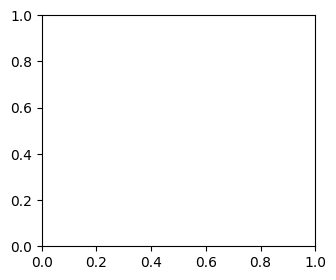

In [ ]:
fun(data_c,'Fare_e')

In [ ]:
# boxcox:

data_c['Fare_box'] , lam = stats.boxcox(data_c['Fare'])

ValueError: Data must be positive.

In [ ]:
lam

0.8229818768553208

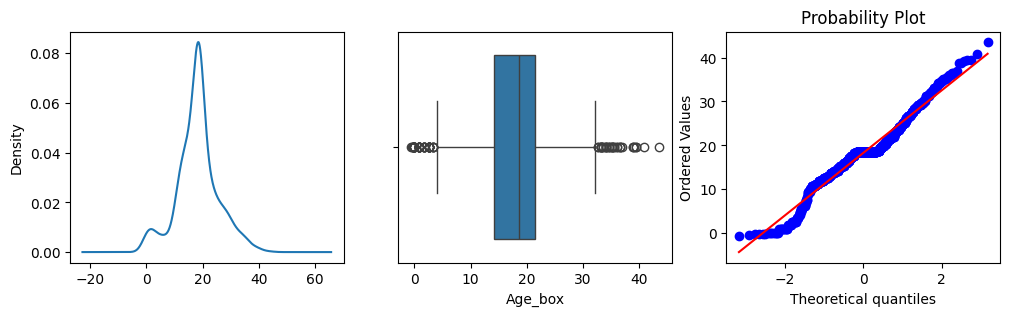

In [ ]:
fun(data_c,'Age_box')

In [ ]:
# yeojohnson Transformation

data_c['Age_Yeo'],lam = stats.yeojohnson(data_c['Age'].fillna(data_c['Age'].mean()))


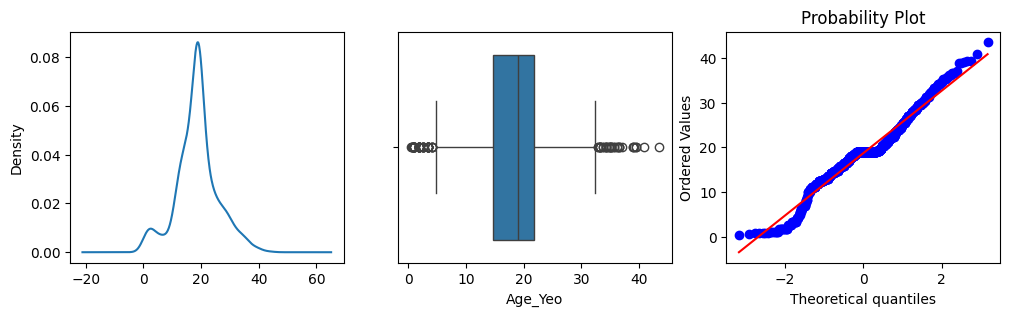

In [ ]:
fun(data_c,'Age_Yeo')